# Divya BM
# Prediction using Decision Tree Algorithm

In [11]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris=datasets.load_iris()
data=pd.DataFrame(iris.data,columns=iris.feature_names)
data.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
y=iris.target
y=pd.DataFrame(y,columns=['Target'])
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [14]:
df=pd.concat([data,y],axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
df['target']=iris.target
df['species']=df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


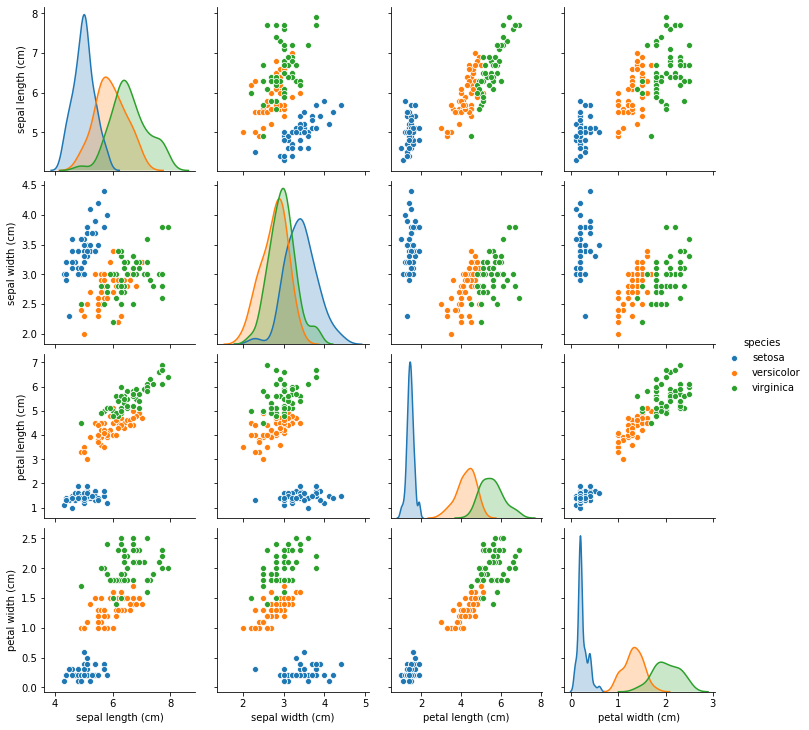

In [17]:
#pair plot
sns.pairplot(df,hue='species',vars=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])

This pairplot shows the distribution of single variables as well as relationship between two variables

In [19]:
df=df.drop('species',axis='columns')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


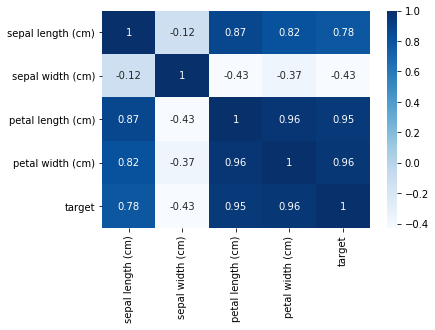

In [27]:
# plotting correlation using heat map
correlation=df.corr()
sns.heatmap(correlation,annot=True,cmap='Blues')

<Figure size 720x576 with 0 Axes>

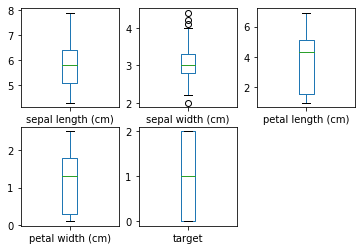

<Figure size 432x288 with 0 Axes>

In [28]:
plt.figure(figsize=[10,8])
df.plot(kind='box',subplots=True,sharey=False,sharex=False,layout=(2,3))
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

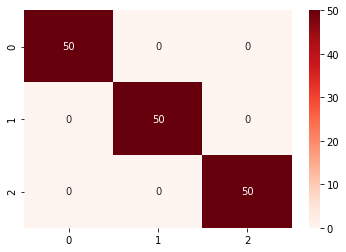

In [32]:
dt_predict=dtree.predict(data)
sns.heatmap(confusion_matrix(y,dt_predict),annot=True,cmap='Reds')

In [30]:
# classification report
class_rep=classification_report(y,dt_predict)
print(class_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [33]:
# accuracy
accuracy=accuracy_score(y,dt_predict)
print('Accuracy is:',accuracy)

Accuracy is: 1.0


### Train test split

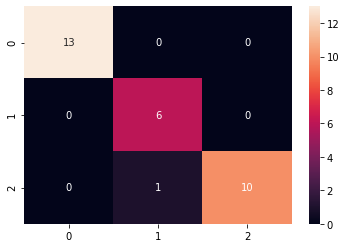

In [34]:
xtrain,xtest,ytrain,ytest=train_test_split(data,y,random_state=123,test_size=0.2)
dtree.fit(xtrain,ytrain)
dt_predict=dtree.predict(xtest)
sns.heatmap(confusion_matrix(ytest,dt_predict),annot=True)

In [43]:
# accuracy
#accuracy=accuracy_score(ytest.dt_predict)
#print('Accuracy is:',accuracy)

### Visualization of Decision Tree Classifier 

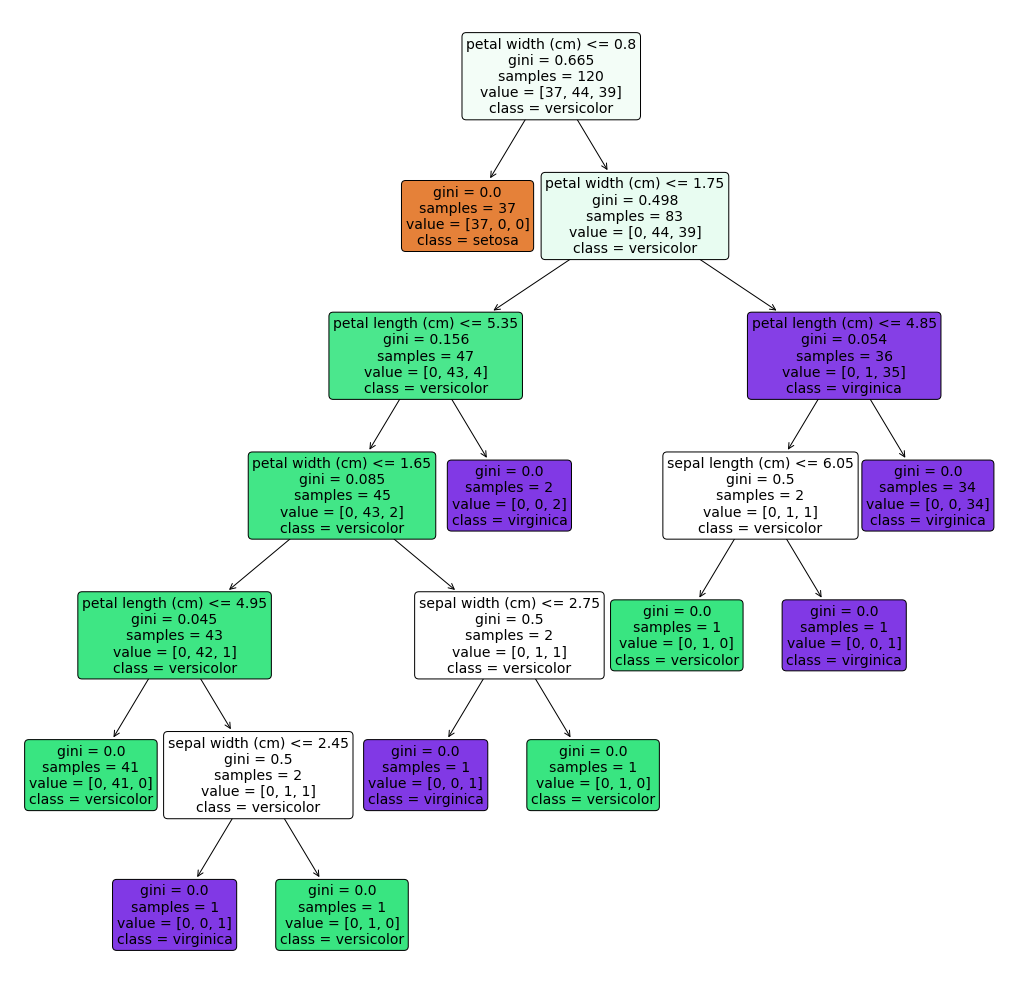

In [41]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
dtc.score(xtest,ytest)
plt.figure(figsize=(18,18))
a=plot_tree(dtc,feature_names=iris.feature_names,class_names=iris.target_names,filled=True,rounded=True,fontsize=14)